# Plane wave expansion for a 2D photonic crystal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from legume import PlaneWaveExp, Circle, ShapesLayer, Lattice, viz

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define 2D photonic crystal

In this notebook we will reproduce the modes for one of the structures discussed in Chapter 5 from "Photonic Crystals: Molding the Flow of Light" - the photonic crystal bible by John D. Joannopoulos, Steven Johnson, Joshua Winn and Robert Meade.


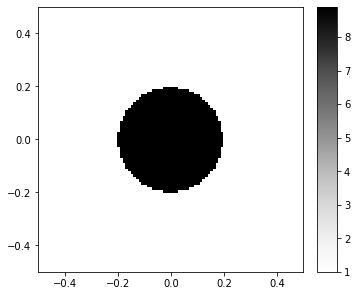

In [2]:
# Define parameters as for Chapter 5, Fig. 2 from Molding the Flow of Light
ra = 0.2      # cylinder radius
eps_c = 8.9   # cylinder permittivity

# Initialize lattice
lattice = Lattice('square')
# Initialize layer
layer = ShapesLayer(lattice)
# Add a cylinder to the layer
layer.add_shape(Circle(r=ra, eps=eps_c))
# Visualize the structure
viz.eps(layer, cbar=True)

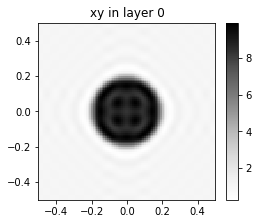

In [3]:
# Initialize the BZ bath as in Chapter 5, Fig. 2
path = lattice.bz_path(['G', 'X', 'M', 'G'], [20])

# Initialize the plane-wave expansion and visualize the FT of the structure
pwe = PlaneWaveExp(layer, gmax=5)
viz.eps_ft(pwe, figsize = (4, 3))

## Compute the photonic bands

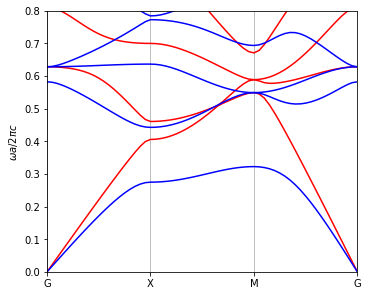

In [5]:
# Run the plane-wave expansion for the two separate polarizations and store the bands
pwe.run(kpoints=path['kpoints'], pol='te')
freqs_te = pwe.freqs
pwe.run(kpoints=path['kpoints'], pol='tm')
freqs_tm = pwe.freqs

# Plot the results
fig, ax = plt.subplots(1, constrained_layout=True, figsize=(5, 4))
plt.plot(freqs_te, 'r')
plt.plot(freqs_tm, 'b')
ax.set_ylim([0, 0.8])
ax.set_xlim([0, pwe.freqs.shape[0]-1])
ax.set_ylabel("$\omega a/2\pi c$")

# The `path` dict provides some useful functionality for labeling of the BZ path
plt.xticks(path['indexes'], path['labels'])
ax.xaxis.grid('True')
plt.show()

Compare this to Chapter 5, Fig. 2 from "Molding the Flow of Light"

![bands](img/pwe_phc_bands.png)

## Visuzlize the field of a mode

We can also plot the fields and compare to Fig. 3 of the book. Note that all fields are always continuous in wave-expansion methods, but the discontinuities are captured better and better with increasing the truncation of the Fourier basis (here by increasing `gmax`).

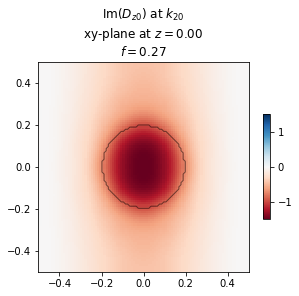

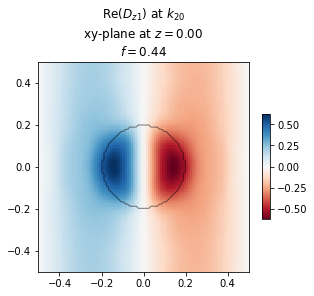

In [6]:
# Compare to Chapter 5, Fig. 3, middle row
viz.field(pwe, field='d', kind=20, mind=0,
            component='z', val='im', N1=100, N2=100, cbar=True, eps=True);
viz.field(pwe, field='d', kind=20, mind=1,
            component='z', val='re', N1=100, N2=100, cbar=True, eps=True);

From the book:

![modes](img/pwe_phc_modes.png)